# Curso  BUAP

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as st
import matplotlib as mpl
import seaborn as sb
import pandas as pd
import numpy as np


from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline
sb.set()

In [13]:
#plt.rcParams['animation.ffmpeg_path'] = '/Library/Python/2.7/site-packages/ffmpeg/' 

In [14]:
#%ls

In [15]:
H0     = 0.7

Ocb    = 0.32
Ok     = 0.0
Omrad  = 0.0001
Ode    = 1 - Ocb - Ok
zvals  = np.linspace(0, 2.5, 300)

def hub(z, Ocb=0.32):
    #H**2/H0**2
    rhow = Ode
    return Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1-Ocb)*rhow

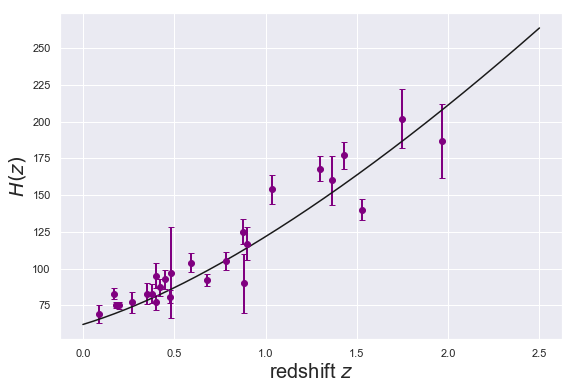

In [16]:
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)
plt.plot(zvals, [100*H0*hub(z, 0.32)**0.5 for z in zvals], 'k-')


dataHz = np.loadtxt('Hz_all.dat')
redshifts, obs, errors = [dataHz[:,i] for i in [0,1,2]]
ax1.errorbar(redshifts, obs, errors/2., xerr=None,
    color='purple', marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
ax1.legend(loc='lower right', frameon=False)
plt.ylabel('$H(z)$', fontsize=20)
plt.xlabel('redshift $z$', fontsize=20)
plt.show()

In [17]:
all_z  = []
all_hz = []
all_Ocb= []
for i in np.linspace(0.1, 1, 10):
    all_Ocb.append(i)
    all_z.append(np.linspace(0, 2.5, 300))
    all_hz.append([100*H0*hub(z, i)**0.5 for z in zvals])

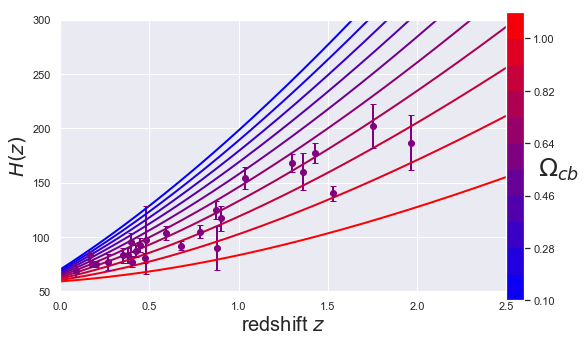

In [18]:
fig = plt.figure(figsize=(8.,5))
ax1 = fig.add_subplot(111)

a = np.array(all_Ocb)
min, max = (a.min(), a.max())
step     = (max-min)/len(a)

mymap    = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
Z        = [[0,0],[0,0]]
levels   = np.arange(min, max+step, step)
CS3      = plt.contourf(Z, levels, cmap=mymap)

all_data = zip(all_z, all_hz, all_Ocb)


for x,y,z in all_data:
    b = (float(z)-min)/(max-min)
    r,g = 1-b, 0
    ax1.plot(x,y,color=(r,g,b), lw=2.)
    
    
dataHz = np.loadtxt('Hz_all.dat')
redshifts, obs, errors = [dataHz[:,i] for i in [0,1,2]]
ax1.errorbar(redshifts, obs, errors/2., xerr=None,
    color='purple', marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
ax1.legend(loc='lower right', frameon=False)
plt.ylabel('$H(z)$', fontsize=20)
plt.xlabel('redshift $z$', fontsize=20)
plt.axis((0, 2.5 , 50, 300))

cbaxes = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cbar   = plt.colorbar(CS3, cax = cbaxes)
cbar.set_label('$\Omega_{cb}$', rotation=0, fontsize=25)
plt.grid()        
        
plt.show()

# Funcion de correlacion

In [19]:
# Ejercicio final: proponer una teoria para ajustarla
# -- guardar valores para despues comparar

In [20]:
#r     = np.array(df[df['r']>=25]['r'].tolist())  
#sigma = 10
#mu    = 105
#A     = 2.5
#function = -0.18+ 0.0004*r + 250*r**(-2.) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2)) \
#         +np.random.normal(-0.0, 0.02,  size=len(r))
#error     = np.array(df[df['r']>=25]['r2error'].tolist()) 
#plt.plot(r, function , 'o')
#plt.show()

In [21]:
#dg = pd.DataFrame({'r':r, 'r2xi':function, 'r2error':error})
#dg.to_csv('new_dr14.csv', index=False)

# Data

In [24]:
# Leer archivos

dq = pd.read_csv('new_dr14.csv',  sep=',')
dq = dq.set_index('r', drop=False)
dq.head(3)

,r,r2error,r2xi
r,,,
26.0,26.0,0.007621,0.194600
30.0,30.0,0.008811,0.105661
34.0,34.0,0.009856,0.076605


In [25]:
# Ejercicio 7: usando los nuevos datos graficarlos

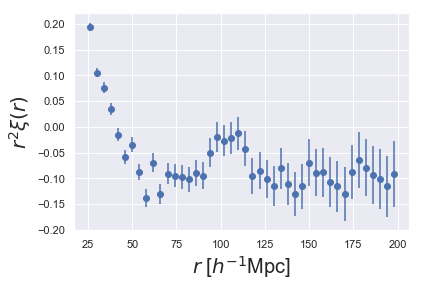

In [27]:
plt.figure()
ax = dq['r2xi'].plot(yerr=dq['r2error'], fmt='o')
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
plt.show()

In [28]:
s= dq['r2error']**2
covariance = pd.DataFrame(np.diag(s),index=s.index,columns=s.index)

/Users/josevazquezgonzalez/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


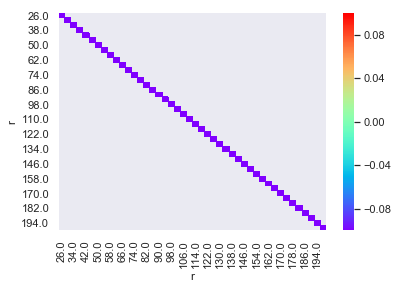

In [29]:
heat = np.log(abs(covariance))
sb.heatmap(heat, cmap='rainbow')
plt.show()

# The theory

### xi(r) = A*r^(-2) + polynomials(r) + Gaussian_for_BAO(alpha*r)

In [30]:
def poli(r):
    return -0.18+ 0.0004*r + 250*r**(-2.)

def xi(r, mu=100., sigma=8., A=2.):
    return poli(r) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

# Cuales valores de A, mu y sigma ajustan mejor

# Testing

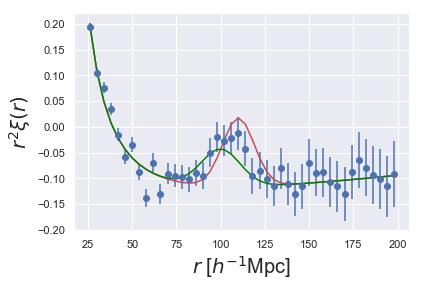

In [31]:
plt.figure()

plt.plot(dq['r'], xi(dq['r'], 110, 9, 3), 'r')
plt.plot(dq['r'], xi(dq['r'], 100, 11, 2), 'green')

ax = dq['r2xi'].plot(yerr = dq['r2error'], fmt='o')

ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
plt.show()

## Fit the function only with mu

In [32]:
def loglike(mu):
    delta     = xi(dq['r'], mu) -  dq['r2xi']
    chisquare = np.dot(delta, np.dot(np.linalg.inv(covariance), delta))
    return -chisquare/2

In [33]:
#Ejercicio 8: Calcular loglike para diferentes valores de mu y graficar

In [34]:
mu_values = np.arange(80., 150., 5.)
probable  = [loglike([i]) for i in mu_values]

Text(0.5,0,'$\\mu$')

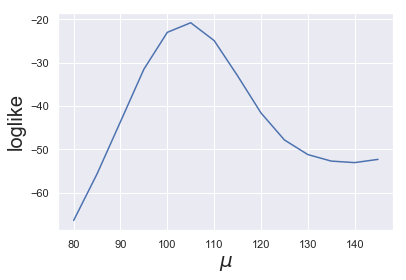

In [35]:
plt.plot(mu_values, probable)
plt.ylabel('loglike',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)

## mu and sigma

In [36]:
# Ejercicio 9: Lo mismo pero para mu y sigma

In [37]:
def loglike(mu, sigma):
    
    delta = xi(dq['r'], mu, sigma) -  dq['r2xi']
    chisquare = np.dot(delta, np.dot(np.linalg.inv(covariance), delta))
    return -chisquare/2

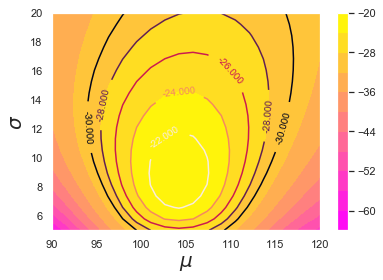

In [38]:
from matplotlib import ticker, cm

x = np.linspace(90, 120, 20)
y = np.linspace(5, 20, 20)

grid = [map(lambda p: loglike(p, sigma=i), x) for i in y]

fig, ax = plt.subplots()
gs = ax.contourf(x, y, grid, 10, cmap='spring')
cbar = fig.colorbar(gs)

CS = ax.contour(x, y, grid, np.arange(-30., -10, 2))
ax.clabel(CS, inline=10, fontsize=10)

plt.ylabel('$\sigma$',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)
plt.show()

# Tma de Bayes

$P(\theta|D, H)=\frac{P(D|\theta,H)P(\theta|H)}{P(D|H)}.$

$P(D|H)=\int d^N\theta P(D|\theta,H)P(\theta|H),$

# Numeros Aleatorios

##  Método del cuadrado central (1946 John von Neumann)

In [8]:
seed = 1982
y = seed**2 
y

3928324

In [9]:
# Ejercicio extra : separar los cuatro digitos

In [10]:
digits  = [int(i) for i in str(y)]
part    = int(np.ceil(len(digits)/2.))
rdigits = digits[part - 2 : part + 2]
rnumber = int(''.join(map(str, rdigits)))
rnumber

2832

In [13]:
def ran_numbers(seed, num=1):
    random = []
    print ' -- random numbers out of {} -- '.format(seed)
    for i in np.arange(num):
        y = seed**2
        digits  = [int(i) for i in str(y)]
        part    = int(np.ceil(len(digits)/2.))
        rdigits = digits[part - 2 : part + 2]
        rnumber = int(''.join(map(str, rdigits)))
        
        seed = rnumber
        #print '(X_N)^2', y, '\t','X_{N+1}', rnumber
        random.append(seed)
    return random

In [14]:
random = ran_numbers(1981, 50)
random[:10]

 -- random numbers out of 1981 -- 


[2436, 3409, 6212, 5889, 6803, 2808, 8486, 121, 4641, 5388]

In [44]:
#Ejercicio extra
# que pasa con el numero inicial cuando elijo 100
# que pasa con el numero inicial 3792

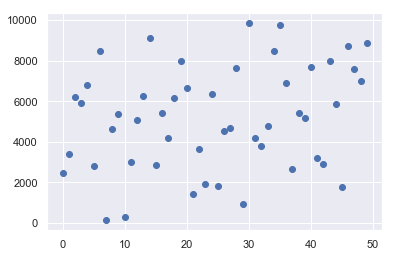

In [45]:
plt.plot(random, 'o')

Scipy random numbers

## https://docs.scipy.org/doc/numpy/reference/routines.random.html

## https://docs.scipy.org/doc/scipy/reference/stats.html

## The probability density function of the uniform distribution is

$p(x) = \frac{1}{b - a}$

mean = $\frac{1}{2}(a+b)$

In [46]:
x = np.linspace(0, 1, 1000)
s = np.random.uniform(0, 1, 1000)

In [47]:
# Ejercicio : graficar puntos con distribucion uniforme

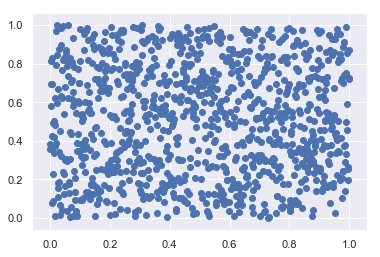

In [48]:
plt.scatter(x, s)

## The probability density for the Gaussian distribution is

$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$


In [49]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [50]:
# Ejercicio : graficar puntos con distribucion gausiana

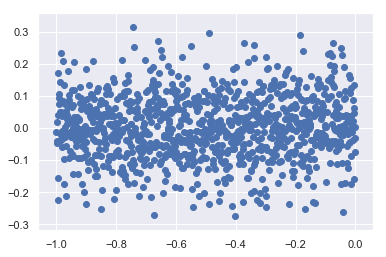

In [51]:
x = np.linspace(-1,0, 1000)
plt.scatter(x, s)

In [52]:
#Ejercicio : graficar gausiana

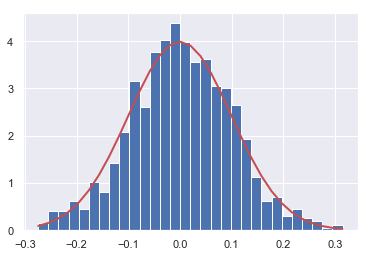

In [53]:
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')

## From Scipy

In [54]:
#calcular mean, var, kurtosis, skewness

In [55]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

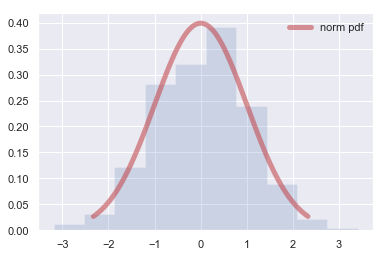

In [56]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

## Other distribution

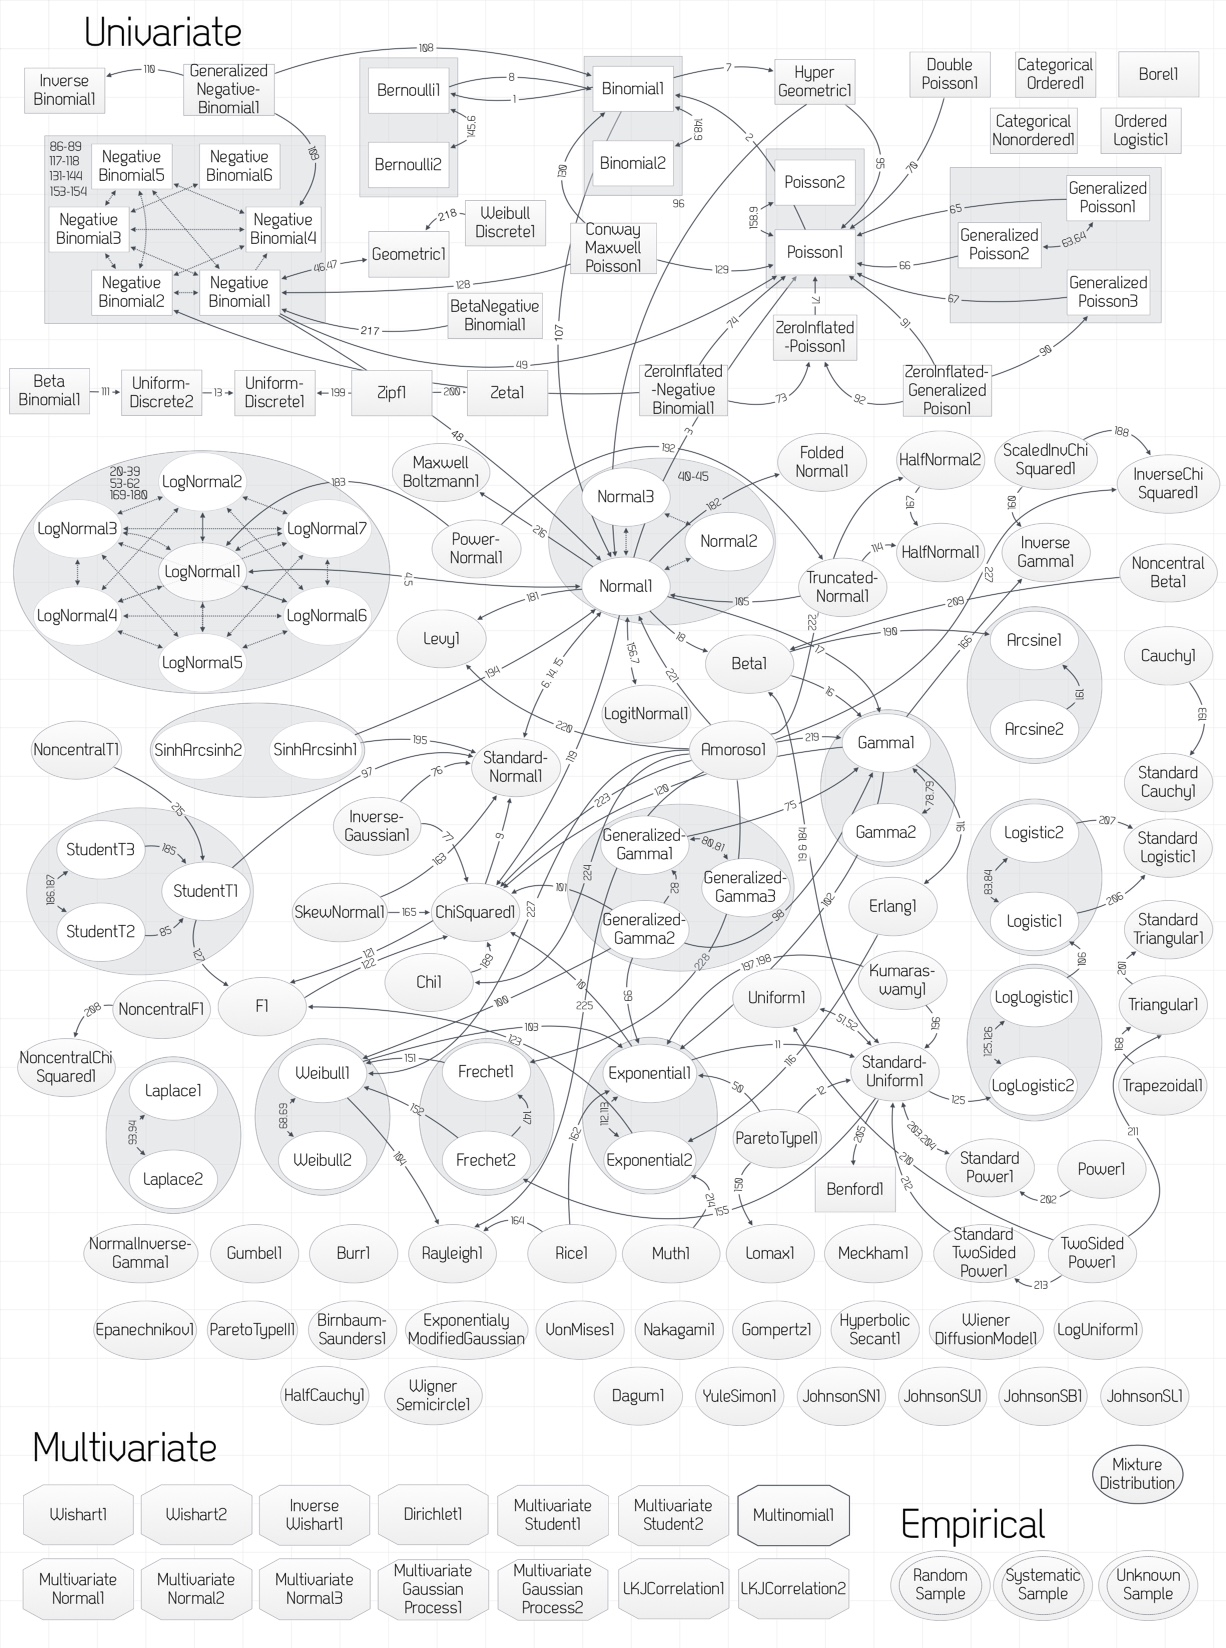

In [57]:
from IPython.display import Image
Image(filename='distributions.jpg')

## Método MC de acierto o fallo

### Usando Sumas de Riemann
https://github.com/neorelativista/IntroMCMC/blob/master/SumasRiemannGrandesNumeros.ipynb

In [58]:
def test_function(x):
    return(np.sqrt(np.arctan(x)))

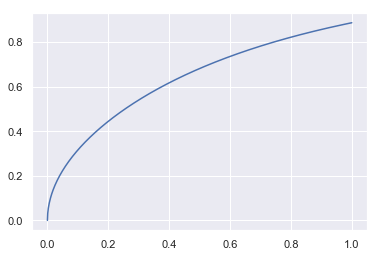

In [59]:
X = np.linspace(0,1,1000)
plt.plot(X, test_function(X))
plt.grid(True)

El área bajo la curva de una función acotada en una región rectangular, $0 \leq g(x) \leq c$.  

Generar puntos aleatorios sobre dicho rectángulo; luego, la probabilidad de acertar a la región bajo la función es:

$\mathit{p}=\frac{\int_a^b g(x)dx}{c(b-a)}=\frac{\mathit{I}}{c(b-a)}$

El parámetro $\mathit{p}$ puede ser estimado de:

$\mathit{\hat{p}}=\frac{n_a}{n}$

In [60]:
#Ejercicio : calcular integral

Integral = 0.6390


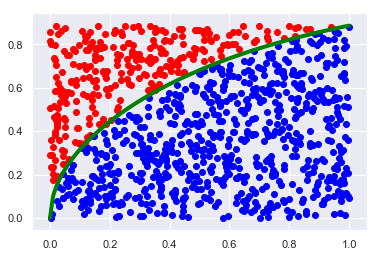

In [61]:
def integrate(x1, x2, func=test_function, n=1000):
    y1    = 0
    y2    = np.max(func(X))
    area  = (x2 - x1)*(y2 - y1)
    
    check = []
    xs    = []
    ys    = []
    for i in np.arange(n):
        x = np.random.uniform(x1, x2, 1)
        xs.append(x)
        y = np.random.uniform(y1, y2, 1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)

    integral = np.mean(check)*area
    print('Integral = {0:.4f}'.format(integral))
    return(xs, ys, check)


x, y, c = integrate(0, 1, n = 1000)
df = pd.DataFrame({'x':x, 'y':y, 'c':c})

plt.scatter(df[df['c'] == 0]['x'], df[df['c']==0]['y'], color='red')
plt.scatter(df[df['c'] == 1]['x'], df[df['c']==1]['y'], color='blue')

X = np.linspace(0, 1, 100)
plt.plot(X, test_function(X), lw=4, c='green')
plt.grid(True)

## See animation

# MCMC

$L(D|\theta)=L(D|\theta_0)\exp \left[-\frac{1}{2}(\theta_i-\theta_{0i})H_{ij}(\theta_j-\theta_{0j})\right]$

$L=L_0e^{-\chi^2/2}$

In [62]:
def loglike(params):  
    mu    = params[0]
    
    delta = xi(dq['r'], mu) -  dq['r2xi']
    chisquare = np.dot(delta, np.dot(np.linalg.inv(covariance), delta))
    return -chisquare/2

In [63]:
#se define funcion objetivo
def target(lik, prior, theta):
    #prior by hand
    if theta < 90 or theta >120:
        return -1.0E50
    else:
        return lik([theta])
    #return lik(param[0], theta).pmf(param[1])*prior.pdf(theta)

In [64]:
#Ejercicio : construir un metropolis, paso a paso

In [65]:
def metropolissampler(niters, lik, prior, theta,  sigma):
    accepted = 0
    samples  = [] 
    likeli   = []
    
    samples.append(theta)
    likeli.append(target(lik, prior, theta))
    
    for i in range(niters):
        theta_p   = theta + sigma* np.random.normal(0., 1., 1) 
        likeratio = np.exp(target(lik, prior, theta_p) - \
                            target(lik, prior, theta))
        rho = np.minimum(1, likeratio)
        
        if rho > np.random.uniform():
            theta = theta_p
            accepted += 1
            
        samples.append(theta)
        likeli.append(target(lik, prior, theta))
    print 'Aceptance rate', 1.0*accepted/niters
    return samples, likeli

   

In [66]:
# Ejercicio : checar convergencia con diferentes sigma/theta

Aceptance rate 0.574
Aceptance rate 0.866
Aceptance rate 0.272


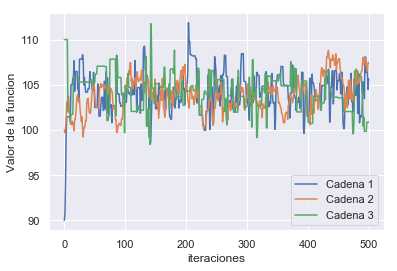

In [67]:
lik    = loglike
sigma  = [3., 1, 10]
theta  = [90., 100, 110.] # guess for p
niters = 500
prior  = st.uniform(1)

cadenas = []
nchains = 3

for i in range(nchains):
    cadenas.append(metropolissampler(niters, lik, prior, theta[i], sigma[i]))
    plt.plot(cadenas[i][0], '-', label = "Cadena "+str(i+1))
    
plt.xlabel("iteraciones")
plt.ylabel("Valor de la funcion")
plt.legend()
plt.show()

#burn-in/thinning

(97, 110)

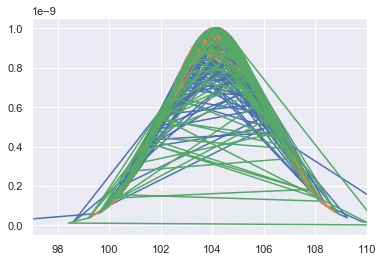

In [68]:
for i in range(nchains):
    plt.plot(cadenas[i][0], np.exp(cadenas[i][1]))
plt.xlim(97, 110)

# 2 params

In [69]:
def loglike(params):  
    mu    = params[0]
    sigma = params[1]
    
    
    delta = xi(dq['r'], mu=mu, sigma=sigma) -  dq['r2xi']
    chisquare = np.dot(delta,np.dot(np.linalg.inv(covariance),delta))
    return -chisquare/2

In [70]:
#se define funcion objetivo
def target(lik, prior, theta):
    #prior by hand
    #if theta[0] < 90 or theta[0] >120:
    #    return -1.0E50
    #else:
    return lik(theta)
    #return lik(param[0], theta).pmf(param[1])*prior.pdf(theta)

In [71]:
def metropolissampler(niters, lik, prior, theta,  sigma):
    accepted = 0
    samples  = [] 
    likeli   = []
    
    samples.append(theta)
    likeli.append(target(lik, prior, theta))
    
    for i in range(niters):
        theta_p = theta + sigma* np.random.normal(0.,1., len(theta)) 
        likeratio=np.exp(target(lik, prior, theta_p) - \
                            target(lik, prior, theta))        
        rho = np.minimum(1, likeratio)
        
        
        if rho > np.random.uniform():
            theta = theta_p
            accepted += 1
            
        #cuando GR = 1 stop:
            
        samples.append(theta)
        likeli.append(target(lik, prior, theta))
    print 'Aceptance rate', 1.0*accepted/niters
    return samples


Aceptance rate 0.403333333333
Aceptance rate 0.406666666667
Aceptance rate 0.426666666667
Aceptance rate 0.243333333333


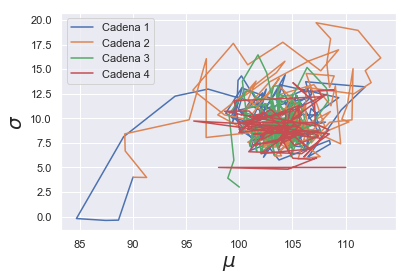

In [72]:
lik    = loglike
sigma  = [[3., 3], [3., 3] , [1, 4], [10, 2]]
theta  = [[90., 4],[90., 4], [100, 3], [110., 5]] # guess for mu, sigma
niters = 300
prior  = st.uniform(1)

nchains = 4
cadenas = []

for i in range(nchains):
    cadenas.append(metropolissampler(niters, lik, prior, theta[i], sigma[i]))
    plt.plot(zip(*cadenas[i])[0], zip(*cadenas[i])[1], label = "Cadena "+str(i+1))
    
cadenas = np.array(cadenas)
plt.ylabel('$\sigma$',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)
plt.legend()
plt.show()

# See animation

# Convergencia

In [73]:
chains = np.array(cadenas)

mean_chain = []
var_chain  = []

n_chains, n_steps, n_params   = np.shape(chains)
bi = int(n_steps*0.1)

for chain in chains:
    mean_chain.append(np.mean(chain[bi:], axis=0))
    var_chain.append( np.var( chain[bi:], axis=0))
    
M = np.mean(mean_chain, axis=0)
W = np.mean(var_chain,  axis=0)



B = 0
for i in np.arange(n_chains):
    B += (mean_chain[i] - M)**2

B = n_steps/(n_chains - 1)*B
R = (1- 1./n_steps)*W +  B/n_steps

print np.sqrt(R/W), M, W

#print 'Gelman-Rubin Diagnostic:', 1 - np.sqrt(R/W)

[1.03086846 1.01370111] [104.05024927   9.59168629] [5.13391783 4.4721682 ]


In [74]:
n = cadenas[0].shape[0]
mean1 = cadenas[1].mean()
mean2 = cadenas[2].mean()
mean = (mean1 + mean2)/2

W = (cadenas[0].std()**2 + cadenas[1].std()**2)/2

B = n * ((mean1 - mean)**2 + (mean2 - mean)**2)
var_theta = (1 - 1./n) * W + 1./n*B

#print W, B, n

print("Gelman-Rubin Diagnostic: ",  np.sqrt(var_theta/W))

('Gelman-Rubin Diagnostic: ', 0.9983603719196112)


In [75]:
cadenas[0].std()**2, np.var(chains[0], axis=0)

(2174.886854605934, array([24.26381484,  9.6455642 ]))

# Para generar la animacion

In [76]:
def metropolissampler2(niters, lik, prior, theta,  sigma):
    accepted = 0
    repeated = 1
    data     = []

    tmp= [target(lik, prior, theta)]
    tmp.extend(theta)
    tmp.extend([repeated])
    data.append(tmp)

    for i in range(niters):
        theta_p  = theta + sigma* np.random.normal(0.,1., len(theta)) 
        likeratio=np.exp(target(lik, prior, theta_p) - \
                            target(lik, prior, theta))        
        rho = np.minimum(1, likeratio)
        
        if rho > np.random.uniform():
            theta = theta_p
            accepted += 1
            repeated = 1
        else:
            repeated += 1
            
        tmp= [target(lik, prior, theta)]
        tmp.extend(theta)
        tmp.extend([repeated])
        data.append(tmp)

    print 'Aceptance rate', 1.0*accepted/niters
    return data

In [78]:
lik    = loglike
sigma  = [[3., 3] , [5, 4], [7, 2]]
theta  = [[70., 10], [120, 20], [110., 25]] 
niters = 1000

nchains = 3


for i in range(nchains):
    tmp= metropolissampler2(niters, lik, prior, theta[i], sigma[i])
    df = pd.DataFrame(tmp)
    df.to_csv('cadenas_{}.txt'.format(i+1), header=None, index=None, sep='\t')

Aceptance rate 0.394
Aceptance rate 0.26
Aceptance rate 0.284


## Mean and std

In [79]:
# Ejercicio : graficar mean and var de las cadenas

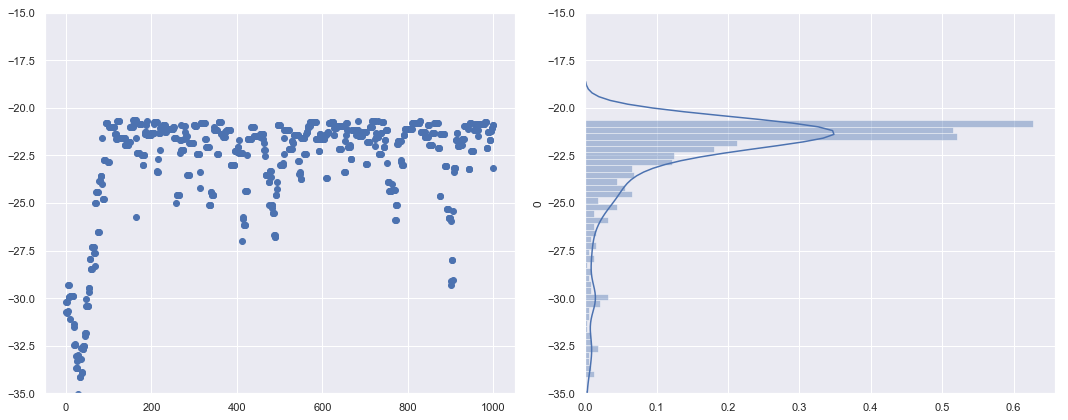

In [80]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(df[0], 'o')
plt.ylim(-35, -15)
plt.subplot(122)
sb.distplot(df[0], vertical=True)
plt.ylim(-35, -15)
plt.tight_layout()

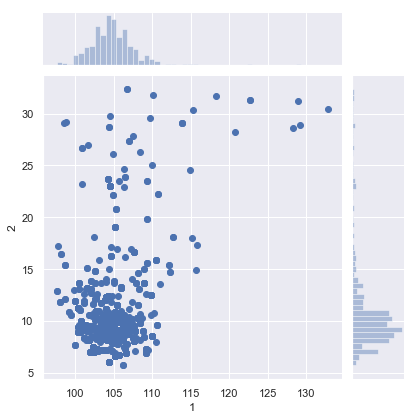

In [81]:
sb.jointplot(df[1], df[2] )#, kind='kde')

In [82]:
df.describe()

,0,1,2,3
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,-22.589234,104.876656,10.924780,3.577423
std,2.702367,3.262864,4.483364,2.955038
min,-36.191442,97.592099,5.709446,1.000000
25%,-22.857870,103.014777,8.521134,1.000000
50%,-21.567168,104.541055,9.637552,3.000000
75%,-21.131904,106.334420,11.121728,5.000000
max,-20.654854,132.909782,32.318081,18.000000


In [83]:
np.cov(df[1], df[2])

array([[10.64628377,  5.04457292],
       [ 5.04457292, 20.10055546]])

## Ellipses

In [84]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
   
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

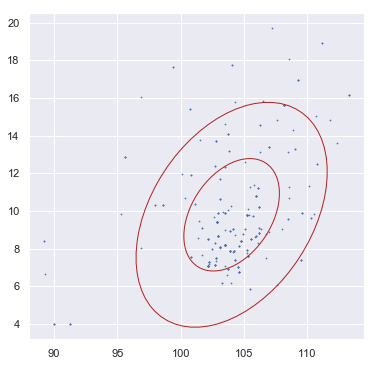

In [85]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
fig, ax_nstd = plt.subplots(figsize=(6, 6))
x = np.array(zip(*cadenas[1])[0])
y= np.array(zip(*cadenas[1])[1])
ax_nstd.scatter(x, y, s=0.5)
confidence_ellipse(x, y, ax_nstd, n_std=1,  label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,  label=r'$1\sigma$', edgecolor='firebrick')

In [86]:
#from MCEvidence import MCEvidence
#MLE = MCEvidence('/Users/josevazquezgonzalez/Desktop/MCMC_Gto_2019/EvidenciaBayesiana/example/').evidence()